<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 2*

# 📝 Assignment

---


# Text Vectorization & Documents Classification

* 텍스트의 벡터화 실습 : Job descrition 스크래핑 데이터
* 텍스트에서 특성을 추출하고 문서 분류기를 만들어 보세요.
* LSA를 사용해 문서의 차원을 축소해 분류에 사용합니다.
* Spacy 단어 임베딩을 사용합니다.

## Text Vectorization

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다. 이 데이터를 이용해 다음 체크포인트를 진행해 보세요!

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

### 1) Spacy를 사용해 description 칼럼 문서들을 토큰화 합니다.

In [2]:
# for Colab User
# Upload files
from google.colab import files
uploaded = files.upload()

Saving Data_Scientist.csv to Data_Scientist.csv


In [60]:
df = pd.read_csv("Data_Scientist.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,title,company,description,url
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...


In [61]:
df.dtypes

title          object
company        object
description    object
url            object
dtype: object

In [62]:
df.isnull().sum()

title          0
company        0
description    0
url            0
dtype: int64

In [63]:
df = df.drop_duplicates(['description'], keep='last').reset_index(drop=True)
print(data.shape)
df.head()

(757, 5)


,title,company,description,url
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,https://www.indeed.com/viewjob?jk=4bff8a12d5ce...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...",https://www.indeed.com/viewjob?jk=90f7a420e89b...


In [29]:
nlp = spacy.load("en_core_web_sm")
def tokenize(document):
    document = document.lower().replace('\n', ' ')
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc
            if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

# spacy의 언어모델을 이용하여 token화된 단어들을 확인합니다. 
df['tokens'] = df['description'].apply(tokenize)

In [32]:
df['tokens'][0][:10]

['job',
 'detail',
 'description',
 'essential',
 'duty',
 'responsibility',
 'new',
 'investment',
 'assist',
 'implement']

### 2) CountVectorizer를 이용해 각 문서들을 벡터화 한 뒤 가장 많은 빈도로 나타나는 단어들을 시각화 합니다.

In [64]:
vect = CountVectorizer(stop_words='english',
                       tokenizer = tokenize,
                       max_features=20000)
dtm_vect = vect.fit_transform(df['description'])
dtm_vect = pd.DataFrame(dtm_vect.todense(),
                        columns = vect.get_feature_names())
print(dtm_vect.shape)
dtm_vect.head()

(757, 9639)


,aa,aaai,aag,aav,ab,abbott,abercrombie,abet,abide,abilitiesproven,ability,abilitywillingness,able,abnormal,aboard,abound,abrams,abreast,abroad,absence,absolutely,absorb,abstract,abstraction,abundance,abundant,abuse,abusebuild,abusive,aca,academia,academic,academically,accelerate,accelerated,acceleration,accelerator,accelerometry,accenture,accept,...,yello,yelp,yes,yguado,yield,yoga,yogurt,york,yorker,young,youth,youtube,youâll,yoy,yrc,yrs,yugabyte,z,zarr,zelis,zemeckis,zeppelin,zero,zillow,zker,zllius,zoho,zone,zoom,zoonotic,zoos,zr,zsh,zulily,zurich,zweig,µl,à,â,сompetitive
0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,7,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


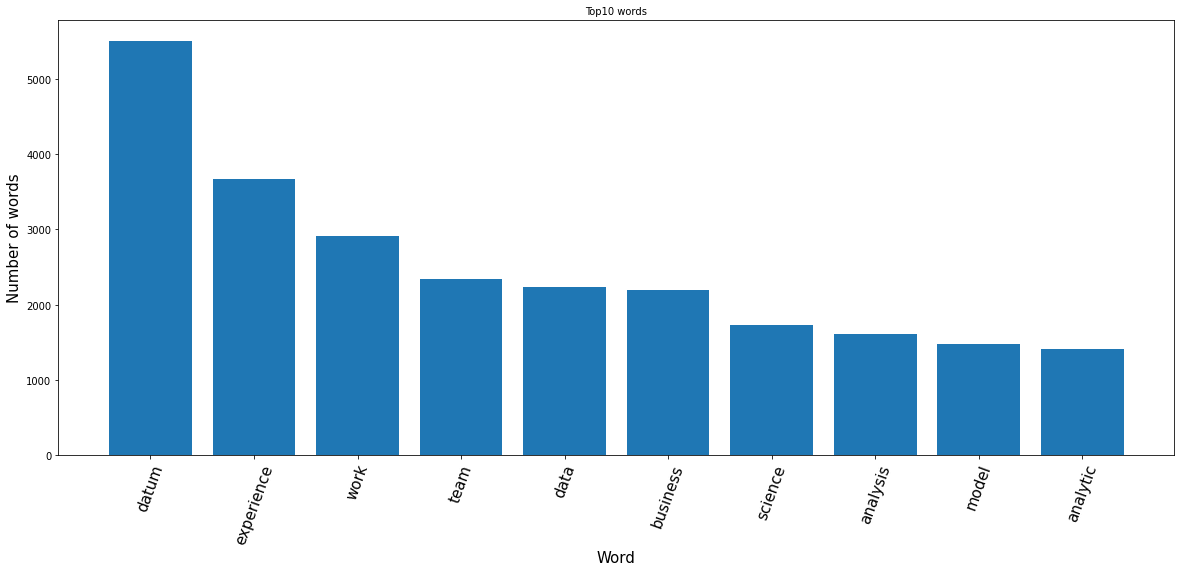

In [65]:
rs_vect = dtm_vect.sum().sort_values(ascending=False)

# 많이 등장하는 단어 상위 20개 시각화
plt.figure(figsize=(20, 8))
plt.bar(x=rs_vect[:10].index, height=rs_vect[:10].values)
plt.xlabel('Word', size=15)
plt.ylabel('Number of words', size=15)
plt.title('Top10 words', size=10)
plt.xticks(size=15, rotation=70)
plt.show();

In [66]:
print(rs_vect[:5].index)
print(rs_vect[:5].values)

Index(['datum', 'experience', 'work', 'team', 'data'], dtype='object')
[5505 3666 2913 2336 2236]


### 3) tfidfVectorizer를 이용해 각 문서들을 벡터화 합니다.

In [67]:
tfidf = TfidfVectorizer(stop_words='english',
                        tokenizer=tokenize,
                        ngram_range = (1,2),
                        max_df = 0.7,
                        min_df = 2)
dtm_tfidf = tfidf.fit_transform(df['description'])
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(),
                         columns=tfidf.get_feature_names())
print(dtm_tfidf.shape)
dtm_tfidf.head()

(757, 36289)


,aa,aa employer,aa m,aa policy,aav,aav capsid,aav gene,ab,ab test,ab testing,abide,abide requirement,ability,ability ability,ability accurately,ability achieve,ability adapt,ability adjust,ability analyze,ability apply,ability articulate,ability autonomously,ability balance,ability break,ability breakdown,ability build,ability business,ability characteristic,ability clearly,ability collaborate,ability collect,ability communicate,ability competency,ability complete,ability complex,ability comprehend,ability conduct,ability construct,ability contribute,ability convey,...,year teradata,year time,year total,year utilize,year volunteer,year work,year year,yearly,years,yes,yes fun,yes require,yes time,yield,yoga,yoga wellness,york,york city,york london,york new,york ny,york remote,york state,york times,york university,yorker,youth,youtube,youâll,yrs,zeppelin,zero,zero waste,zillow,zillow group,zone,zoom,â,сompetitive,сompetitive salary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047565,0.0,0.0,0.0,0.060153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048360,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032234,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031279,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015159,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4) K-NN 모델을 만들고 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

In [68]:
from sklearn.neighbors import NearestNeighbors
# 모델 생성
nn = NearestNeighbors(n_neighbors=5,
                    algorithm='kd_tree')
nn.fit(dtm_tfidf)
df.index[df['description'].str.contains('python')][0]

48

In [69]:
nn.kneighbors([dtm_tfidf.iloc[100]])

(array([[0.        , 0.73323954, 0.81537261, 0.90937829, 0.91296264]]),
 array([[100,  93, 109, 260, 251]]))

In [70]:
df[['company', 'title']].iloc[[100,  93, 109, 260, 251]]
idx_list = [100,  93, 109, 260, 251]
for idx, key in enumerate(idx_list):
    print(f'{idx}번째로 유사한 job description ({key}번)')
    
    value = df['description'].iloc[key].replace('\n', ' ')
    print(value[:2000])
    print()

0번째로 유사한 job description (100번)
Facebook's mission is to give people the power to build community and bring the world closer together. Through our family of apps and services, we're building a different kind of company that connects billions of people around the world, gives them ways to share what matters most to them, and helps bring people closer together. Whether we're creating new products or helping a small business expand its reach, people at Facebook are builders at heart. Our global teams are constantly iterating, solving problems, and working together to empower people around the world to build community and connect in meaningful ways. Together, we can help people build stronger communities - we're just getting started.  How would Facebook scale to the next billion users? The Infrastructure Strategy group is responsible for the strategic analysis to support and enable the continued growth critical to Facebook’s infrastructure organization. The ideal candidate will be passiona

In [71]:
# PCA를 사용해서 2차원으로 차원 축소하여 시각화
from sklearn.decomposition import PCA

nn_result = dtm_tfidf.iloc[idx_list]

pca = PCA(n_components=2)
word_vect_2d = pca.fit_transform(nn_result)
word_vect_2d

array([[-0.16910197,  0.49811945],
       [-0.45057577, -0.10779795],
       [-0.45607952, -0.24709834],
       [ 0.53819509, -0.06840297],
       [ 0.53756218, -0.0748202 ]])

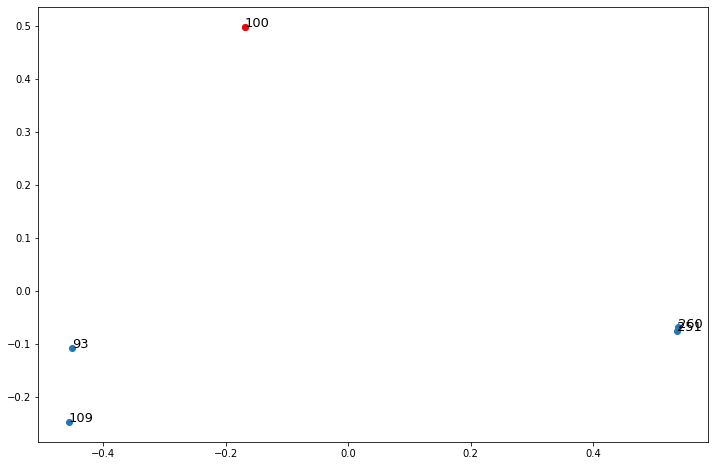

In [72]:
plt.figure(figsize=(12, 8))

plt.scatter(word_vect_2d[:, 0], word_vect_2d[:, 1])
plt.scatter(word_vect_2d[0][0], word_vect_2d[0][1], c='red')
for idx, coord in zip(idx_list, word_vect_2d):
    x, y = coord
    plt.text(x, y, str(idx), size=13)
plt.show();

In [73]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(nn_result)
X_embedded

array([[-145.15947 , -319.50668 ],
       [-302.20404 , -179.97939 ],
       [ -39.712597,   50.430077],
       [ -29.80149 , -152.38821 ],
       [-246.73676 ,   14.750029]], dtype=float32)

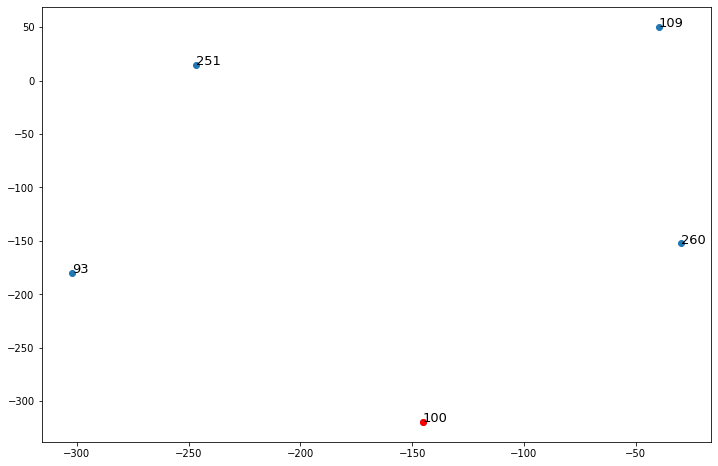

In [75]:
# n_components=2
plt.figure(figsize=(12, 8))

plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.scatter(X_embedded[0][0], X_embedded[0][1], c='red')
for idx, coord in zip(idx_list, X_embedded):
    x, y = coord
    plt.text(x, y, str(idx), size=13)
plt.show();

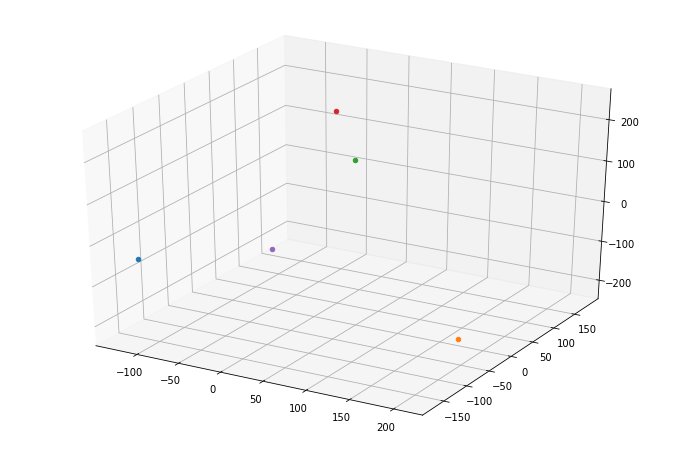

In [76]:
# n_components=3
X_embedded = TSNE(n_components=3).fit_transform(nn_result)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for idx, coord in zip(idx_list, X_embedded):
    xs, ys, zs = coord
    ax.scatter(xs, ys, zs, str(idx))
plt.show();

## Documents Classification

이번 과제에서는 위스키 리뷰 텍스트에서 특성을 추출하고 문서 분류기를 만들어 보겠습니다.

### 데이터를 가져옵니다

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/whisky/train.csv')
# 테스트 세트는 마지막 성능 확인에만 사용합니다.
test = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/whisky/test.csv')

### 1) 데이터를 분석합니다.
- 타겟 분포 등을 확인합니다.
- 타겟별 텍스트를 확인합니다.
- 필요한 분석을 진행합니다.

In [ ]:
# feature -> description 
# rating -> great:0, good:1, bad:2
train.head()

In [ ]:
# 각 카테고리별 문장 샘플을 프린트해 봅니다.
pd.set_option('display.max_colwidth', 0)
train[train.rating == 2].sample(3)

### 훈련/검증 데이터 셋으로 분리합니다
X_train, X_val, y_train, y_val = train_test_split(train['description']
                                                   ,train['rating']
                                                   ,test_size=0.2
                                                   ,stratify=train['rating'] # train/test 모두 rating 비율과 같게 합니다
                                                   ,random_state=1)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

### 2) 파이프라인을 구성해 보세요

In [ ]:
vect = ...
clf = ...

pipe = Pipeline([('vect', vect), ('clf', clf)])
...

In [ ]:
from sklearn.metrics import accuracy_score
...
accuracy_score(pred, sol['rating'])
...

### 3) 하이퍼파라미터를 설정하고 학습을 수행하세요
vectorizer와 분류모델의 최적 하이퍼파라미터를 찾기 위한 설정입니다. 마음것 시도하세요!

In [ ]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20),
    ...
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(..., ...)

### 4) 결과를 분석합니다.
- Accuracy 점수가 70% 이상 나오도록 노력해 보세요!

In [ ]:
# 테스트 세트를 가지고 예측을 수행합니다.
pred = grid_search.predict(test['description'])

In [ ]:
### 결과를 리포팅 합니다.

## 잠재의미분석(Latent Semantic Analysis, LSA)

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD

### 5) 파이프라인을 구성해 보세요

In [ ]:
vect = ...
svd = ...
clf = ...

pipe = Pipeline([
    ('vect', vect)
    , ('svd', svd)
    , ('clf', rfc)
])

### 6) 하이퍼파라미터를 설정해 주세요
vectorizer와 분류모델의 최적 하이퍼파라미터를 찾기 위한 설정입니다.

In [ ]:
parameters = {
    'svd__n_components': [10,100,250],
    'vect__max_df': (0.75, 1.0),
    'clf__max_depth':(5,10,15,20),
    ...
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(..., ...)

### 7) 결과를 분석하세요

In [ ]:
pred = grid_search.predict(test['description'])

In [ ]:
### 결과를 리포팅 합니다.

### 8) Spacy 단어 임베딩을 사용해서 결과를 다시 도출하고 비교 분석합니다.
- 텍스트를 추출하고 분류하는 파이프라인을 만드세요
- 파이프라인을 GridSearchCV 혹은 RandomizedSearchCV를 사용하여 튜닝하세요
- Spacy 단어 임베딩을 사용합니다

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [ ]:
# 단어 임베딩을 사용하세요


In [ ]:
pred = ...predict(test['description'])